# MNIST Classification

######  @ author: Rohit_Raj_Jalheria

1. Introduction  
2. Data Exploration  
    2.1 Load Data  
    2.2 Check for null values  
    2.3 Understand data
3. Data Preprocessing  
    3.1 Feature Scaling / Normalization  
    3.2 Label Encoding  
4. Build Models   
    4.1 Neural Network
5. Evaluate Models  
    5.1 Cross Validation   
6. Hyperparameter Tuning  
7. Predict and Submit  
    7.1 Confusion Matrix  
    7.2 Precision, Recall and F1 Scores  
    7.3 Predict and Submit Results

#  Introduction

Hello Instructors! I started this kernel right after I finished my sessions on **Classification**, and since they say "MNIST is the `hello world` of classification", I jumped into my First Project on Machine Learning to have some hands on experience.

This kernel consists of *7 main parts*, and 5th and 6th are a bit interchangeble. I will try to build 3 different models to classify MNIST images, SVM, KNN, and Random Decision Forest.

##### So let's sail !

# Data Exploration

This is the part where I get to know the data, how is it formatted, what properties it has etc.

###  Load Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
train = pd.read_csv("/content/gdrive/My Drive/mnist_data/mnist_train.csv")
test = pd.read_csv("/content/gdrive/My Drive/mnist_data/mnist_test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
train.shape

(59999, 785)

In [ ]:
train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test set is missing one column, and that is the `label` column, since images are in the form of `28x28` we have `784` feature columns for each image.

### 2.2 Check for null values 

In [ ]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [ ]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

It seems like we do not have any missing values. Perfect!

### 2.3 Split the Data

As I learned; we should always put our test set aside when we are exploring dataset, to prevent our brain to mislead us. Since we are trying to create a solution that generalizes and not memorizes, it is important to modify our data by looking at only to train set and not the test set. Test set should only be used for final evaluation.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]
y_test = test.iloc[0:, 0]
y_train = train.iloc[0:,0]


print("Training Features:", x_train.shape)
print("Training Labels:", y_train.shape)
print("Testing Features:", x_test.shape)
print("Actual Labels:", y_test.shape)
print("Test Features:", test.shape)

Training Features: (59999, 784)
Training Labels: (59999,)
Testing Features: (9999, 784)
Actual Labels: (9999,)
Test Features: (9999, 785)


### save the files

In [ ]:
x_test.to_csv('x_test.csv')
x_train.to_csv('x_train.csv')
y_test.to_csv('y_test.csv')
y_train.to_csv('y_train.csv')

### 2.4 Understand Data

In [ ]:
x_train_explore = x_train.copy()
y_train_explore = y_train.copy()

# del x_train, y_train

In [ ]:
x_test_explore = x_test.copy()
y_test_explore = y_test.copy()

In [ ]:
y_train_explore.describe()

count    59999.000000
mean         4.453924
std          2.889294
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: 5, dtype: float64

In [ ]:
y_train_explore.value_counts().describe()

count      10.000000
mean     5999.900000
std       339.694781
min      5420.000000
25%      5867.750000
50%      5936.000000
75%      6087.750000
max      6742.000000
Name: 5, dtype: float64

In [ ]:
unique_labels = np.unique(y_train_explore)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
frequency = y_train_explore.value_counts()
frequency.sort_values(ascending=False)


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

In [ ]:
type(frequency)

pandas.core.series.Series

In [ ]:
transpose = frequency.T
transpose

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

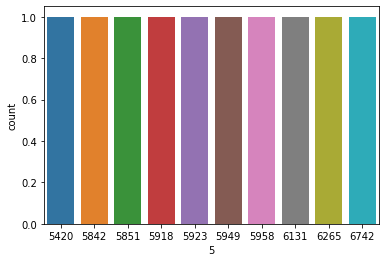

In [ ]:
sns.countplot(x=frequency.index, data=frequency)

(array([1., 0., 0., 4., 2., 1., 1., 0., 0., 1.]),
 array([5420. , 5552.2, 5684.4, 5816.6, 5948.8, 6081. , 6213.2, 6345.4,
        6477.6, 6609.8, 6742. ]),
 <a list of 10 Patch objects>)

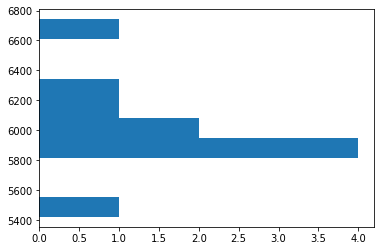

In [ ]:
plt.hist(x=frequency, orientation='horizontal')

[]

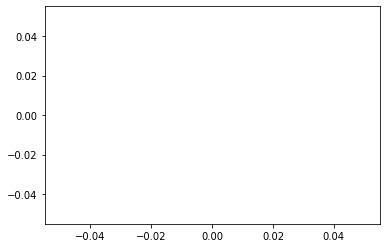

In [ ]:
plt.plot(data=frequency.value_counts(), kind='line')

It looks like only 5 is little less than 4000 and the rest is almost evenly distributed.  


We can move on.

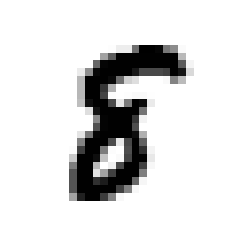

In [ ]:
sample_digit = x_train_explore.iloc[2000] # a random instance
sample_digit_image = sample_digit.values.reshape(28, 28) # reshape it from (784,) to (28,28)
plt.imshow(sample_digit_image, # plot it as an image
           cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

As you can see our data is in this given format.

# 3. Data Preprocessing

### 3.1 Feature Scaling / Normalization

Working with numerical data that is in between `0-1` is more effective for most of the machine learning algortihms than `0-255`.  
We can easily scale our features to `0-1` range by dividing to `max` value (255).

We could use `MinMaxScaler` from `sklearn.preprocessing` but since the formula for that is `(x-min)/(max-min)` and our `min` is 0, we could directly calculate `x/max` and that is `x/255`.  

This is going to give the same result. So let's do it!


In [ ]:
x_train_scaled = x_train_explore.copy()
x_train_scaled = x_train_scaled / 255.0


x_train_scaled.iloc[2]

0        0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
        ... 
0.613    0.0
0.614    0.0
0.615    0.0
0.616    0.0
0.617    0.0
Name: 2, Length: 784, dtype: float64

In [ ]:

x_test_scaled = x_test_explore.copy()
x_test_scaled = x_test_scaled / 255.0

np.array(x_test_scaled.iloc[2]).reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
sample_scaled = np.array(x_train_scaled.iloc[2]).reshape(28,28)

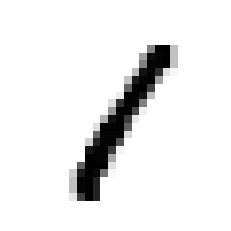

In [ ]:
plt.imshow(sample_scaled, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [ ]:
x_train = x_train_scaled.copy()
y_train = y_train_explore.copy()
x_test = x_test_scaled.copy()
y_test = y_test_explore.copy()

del x_train_explore, x_train_scaled, y_train_explore, x_test_explore, x_test_scaled, y_test_explore

# 4. Build Model

We are going to build the base models first, then we are going to try to  `fine-tune` them.

### Helper Function


In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## MultiLayer Perceptron Classifier

We are going to create the MLP classifier.
We are going to `fit()` the training data.

Multi-layer perceptron is the one that requires most modification. Of course default values are already set in its **\_\_init\_\_** method but it is better if we customize it according to our needs. Of course there are no strict rules these parameters but we are going to try to do our best.


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Important parameters
# hidden layer size
# activation function
# alpha -> learning rate
# random_state -> set to get remove randomness effect for different runs
# momentum
# max_iter

mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_pred = mlp_clf.predict(x_test)

In [ ]:
print('MLP_Accuracy: ', accuracy_score(y_test, mlp_pred))

MLP_Accuracy:  0.9783978397839784


In [ ]:
from sklearn.metrics import confusion_matrix
mlp_cf = confusion_matrix(y_test, mlp_pred)

In [ ]:
mlp_cf

array([[ 973,    0,    0,    0,    0,    0,    2,    1,    3,    1],
       [   0, 1125,    4,    0,    0,    0,    1,    1,    4,    0],
       [   4,    2, 1005,    3,    2,    0,    3,    4,    8,    1],
       [   1,    1,    3,  990,    0,    3,    0,    4,    0,    8],
       [   3,    0,    4,    1,  957,    1,    3,    2,    0,   11],
       [   1,    0,    0,    6,    1,  876,    3,    1,    1,    3],
       [   4,    2,    3,    1,    6,    5,  935,    0,    2,    0],
       [   1,    2,   10,    3,    2,    1,    0,  997,    4,    7],
       [   3,    0,    6,    6,    3,    4,    2,    4,  942,    4],
       [   2,    2,    0,    4,    6,    5,    1,    3,    3,  983]])

looks like a pretty good model aompared to others

In [ ]:
from sklearn.metrics import plot_confusion_matrix


In [ ]:
## error analysis

# highlight the error by normalization
row_sum = mlp_cf.sum(axis=1, keepdims = True)
mlp_cf_normalized = mlp_cf/row_sum

# remove the correct predictions
np.fill_diagonal(mlp_cf_normalized, 0)
plt.matshow(mlp_cf_normalized, cmap=plt.cm.gray)
plt.show()

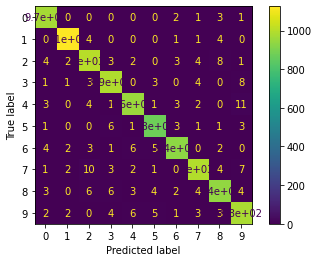

In [ ]:
plot_confusion_matrix(mlp_clf, x_test, y_test)

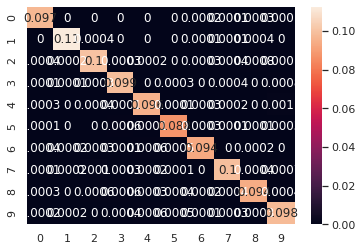

In [ ]:
import seaborn as sns
sns.set()
sns.heatmap(mlp_cf/np.sum(mlp_cf), annot=True)

## MLP with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
mlp_scores = cross_val_score(mlp_clf,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10,
                             verbose=10)
mlp_rmse_scores = np.sqrt(-mlp_scores)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................... , score=-0.405, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] ................................... , score=-0.443, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] ................................... , score=-0.459, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min remaining:    0.0s


[CV] ................................... , score=-0.422, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.2min remaining:    0.0s


[CV] ................................... , score=-0.410, total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.7min remaining:    0.0s


[CV] ................................... , score=-0.386, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.1min remaining:    0.0s


[CV] ................................... , score=-0.409, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 10.5min remaining:    0.0s


[CV] ................................... , score=-0.472, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.0min remaining:    0.0s


[CV] ................................... , score=-0.517, total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 13.5min remaining:    0.0s


[CV] ................................... , score=-0.412, total= 1.4min
Multilayer Perceptron Scores



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.9min finished


NameError: ignored

In [ ]:
print("Multilayer Perceptron Scores\n")
display_scores(mlp_rmse_scores)


Multilayer Perceptron Scores

Scores: [0.6363961  0.66558245 0.67724934 0.64987178 0.64031242 0.62128898
 0.63979163 0.68702256 0.71902712 0.64218538]

Mean: 0.657872778044209
Standard deviation: 0.02787378594387882


## Hyperparameter Tuning of MulitLayer Perceptron

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp_parameter_grid = [
    {'hidden_layer_sizes': [(100, ), (200, ), (300, )],
     'solver': ['sgd', 'adam'],
     'learning_rate_init':[0.0001, 0.001]
    }
]

mlp_grid_clf = MLPClassifier(random_state=42, verbose=True)
mlp_grid_search = GridSearchCV(mlp_grid_clf,
                              mlp_parameter_grid,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              verbose=3)
mlp_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] hidden_layer_sizes=(100,), learning_rate_init=0.0001, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 2.28791467
Iteration 2, loss = 2.12868479
Iteration 3, loss = 1.98718649
Iteration 4, loss = 1.85282743
Iteration 5, loss = 1.72343851
Iteration 6, loss = 1.60039403
Iteration 7, loss = 1.48563879
Iteration 8, loss = 1.38068547
Iteration 9, loss = 1.28654082
Iteration 10, loss = 1.20327752
Iteration 11, loss = 1.13011339
Iteration 12, loss = 1.06601436
Iteration 13, loss = 1.00988537
Iteration 14, loss = 0.96063631
Iteration 15, loss = 0.91720670
Iteration 16, loss = 0.87873223
Iteration 17, loss = 0.84451131
Iteration 18, loss = 0.81392912
Iteration 19, loss = 0.78645308
Iteration 20, loss = 0.76161377
Iteration 21, loss = 0.73912312
Iteration 22, loss = 0.71861883
Iteration 23, loss = 0.69989662
Iteration 24, loss = 0.68269755
Iteration 25, loss = 0.66687572
Iteration 26, loss = 0.65226148
Iteration 27, loss = 0.63872544
Iteration 28, loss = 0.62614328
Iteration 29, loss = 0.61443546
Iteration 30, loss = 0.60349286
Iteration 31, loss = 0.59326605
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


Iteration 1, loss = 2.28662309
Iteration 2, loss = 2.12737027
Iteration 3, loss = 1.98603725
Iteration 4, loss = 1.85157662
Iteration 5, loss = 1.72163988
Iteration 6, loss = 1.59776333
Iteration 7, loss = 1.48213152
Iteration 8, loss = 1.37655117
Iteration 9, loss = 1.28200738
Iteration 10, loss = 1.19852966
Iteration 11, loss = 1.12526344
Iteration 12, loss = 1.06116886
Iteration 13, loss = 1.00511870
Iteration 14, loss = 0.95591859
Iteration 15, loss = 0.91256157
Iteration 16, loss = 0.87418076
Iteration 17, loss = 0.84003105
Iteration 18, loss = 0.80952023
Iteration 19, loss = 0.78207353
Iteration 20, loss = 0.75727868
Iteration 21, loss = 0.73482550
Iteration 22, loss = 0.71434599
Iteration 23, loss = 0.69562827
Iteration 24, loss = 0.67845476
Iteration 25, loss = 0.66265085
Iteration 26, loss = 0.64806020
Iteration 27, loss = 0.63454171
Iteration 28, loss = 0.62199383
Iteration 29, loss = 0.61029674
Iteration 30, loss = 0.59937526
Iteration 31, loss = 0.58916485
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.5min remaining:    0.0s


Iteration 1, loss = 2.28741286
Iteration 2, loss = 2.12808090
Iteration 3, loss = 1.98734624
Iteration 4, loss = 1.85422578
Iteration 5, loss = 1.72618015
Iteration 6, loss = 1.60439044
Iteration 7, loss = 1.49072484
Iteration 8, loss = 1.38677957
Iteration 9, loss = 1.29353792
Iteration 10, loss = 1.21101008
Iteration 11, loss = 1.13853254
Iteration 12, loss = 1.07497717
Iteration 13, loss = 1.01917371
Iteration 14, loss = 0.97010266
Iteration 15, loss = 0.92672361
Iteration 16, loss = 0.88825004
Iteration 17, loss = 0.85395009
Iteration 18, loss = 0.82322387
Iteration 19, loss = 0.79556114
Iteration 20, loss = 0.77054428
Iteration 21, loss = 0.74785265
Iteration 22, loss = 0.72715388
Iteration 23, loss = 0.70821943
Iteration 24, loss = 0.69083599
Iteration 25, loss = 0.67482805
Iteration 26, loss = 0.66001313
Iteration 27, loss = 0.64628810
Iteration 28, loss = 0.63352793
Iteration 29, loss = 0.62163507
Iteration 30, loss = 0.61051747
Iteration 31, loss = 0.60011869
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.51452503
Iteration 2, loss = 0.68959241
Iteration 3, loss = 0.49264563
Iteration 4, loss = 0.41261008
Iteration 5, loss = 0.36833826
Iteration 6, loss = 0.33906224
Iteration 7, loss = 0.31754309
Iteration 8, loss = 0.30080212
Iteration 9, loss = 0.28690028
Iteration 10, loss = 0.27467056
Iteration 11, loss = 0.26420744
Iteration 12, loss = 0.25444574
Iteration 13, loss = 0.24571676
Iteration 14, loss = 0.23780942
Iteration 15, loss = 0.23032283
Iteration 16, loss = 0.22322084
Iteration 17, loss = 0.21656922
Iteration 18, loss = 0.21017362
Iteration 19, loss = 0.20459450
Iteration 20, loss = 0.19869440
Iteration 21, loss = 0.19360299
Iteration 22, loss = 0.18829918
Iteration 23, loss = 0.18374560
Iteration 24, loss = 0.17902786
Iteration 25, loss = 0.17466668
Iteration 26, loss = 0.17039528
Iteration 27, loss = 0.16657675
Iteration 28, loss = 0.16274819
Iteration 29, loss = 0.15881578
Iteration 30, loss = 0.15528659
Iteration 31, loss = 0.15190469
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.51227169
Iteration 2, loss = 0.68714994
Iteration 3, loss = 0.49114202
Iteration 4, loss = 0.41079764
Iteration 5, loss = 0.36617033
Iteration 6, loss = 0.33652012
Iteration 7, loss = 0.31454295
Iteration 8, loss = 0.29741336
Iteration 9, loss = 0.28338382
Iteration 10, loss = 0.27102298
Iteration 11, loss = 0.26064921
Iteration 12, loss = 0.25084501
Iteration 13, loss = 0.24219551
Iteration 14, loss = 0.23410097
Iteration 15, loss = 0.22652334
Iteration 16, loss = 0.21939818
Iteration 17, loss = 0.21291117
Iteration 18, loss = 0.20675846
Iteration 19, loss = 0.20104374
Iteration 20, loss = 0.19523245
Iteration 21, loss = 0.19024773
Iteration 22, loss = 0.18526164
Iteration 23, loss = 0.18025161
Iteration 24, loss = 0.17585355
Iteration 25, loss = 0.17146910
Iteration 26, loss = 0.16747538
Iteration 27, loss = 0.16354808
Iteration 28, loss = 0.15977897
Iteration 29, loss = 0.15590231
Iteration 30, loss = 0.15241007
Iteration 31, loss = 0.14920462
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.52518436
Iteration 2, loss = 0.70082164
Iteration 3, loss = 0.49967318
Iteration 4, loss = 0.41853338
Iteration 5, loss = 0.37279491
Iteration 6, loss = 0.34282505
Iteration 7, loss = 0.32046227
Iteration 8, loss = 0.30314479
Iteration 9, loss = 0.28855801
Iteration 10, loss = 0.27634332
Iteration 11, loss = 0.26527707
Iteration 12, loss = 0.25551696
Iteration 13, loss = 0.24651487
Iteration 14, loss = 0.23843982
Iteration 15, loss = 0.23052148
Iteration 16, loss = 0.22327036
Iteration 17, loss = 0.21632592
Iteration 18, loss = 0.21006958
Iteration 19, loss = 0.20385926
Iteration 20, loss = 0.19809458
Iteration 21, loss = 0.19261129
Iteration 22, loss = 0.18730007
Iteration 23, loss = 0.18249651
Iteration 24, loss = 0.17768390
Iteration 25, loss = 0.17326855
Iteration 26, loss = 0.16889382
Iteration 27, loss = 0.16490945
Iteration 28, loss = 0.16090700
Iteration 29, loss = 0.15714512
Iteration 30, loss = 0.15337249
Iteration 31, loss = 0.15005971
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.74455762
Iteration 2, loss = 0.93626444
Iteration 3, loss = 0.67029288
Iteration 4, loss = 0.55920608
Iteration 5, loss = 0.49786358
Iteration 6, loss = 0.45836982
Iteration 7, loss = 0.43037799
Iteration 8, loss = 0.40950469
Iteration 9, loss = 0.39301985
Iteration 10, loss = 0.37955472
Iteration 11, loss = 0.36838307
Iteration 12, loss = 0.35874529
Iteration 13, loss = 0.35038306
Iteration 14, loss = 0.34307878
Iteration 15, loss = 0.33634664
Iteration 16, loss = 0.33035781
Iteration 17, loss = 0.32478013
Iteration 18, loss = 0.31956784
Iteration 19, loss = 0.31503002
Iteration 20, loss = 0.31044267
Iteration 21, loss = 0.30635437
Iteration 22, loss = 0.30218217
Iteration 23, loss = 0.29865610
Iteration 24, loss = 0.29491568
Iteration 25, loss = 0.29150553
Iteration 26, loss = 0.28806419
Iteration 27, loss = 0.28503280
Iteration 28, loss = 0.28194980
Iteration 29, loss = 0.27894814
Iteration 30, loss = 0.27608701
Iteration 31, loss = 0.27343505
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.74280369
Iteration 2, loss = 0.93181170
Iteration 3, loss = 0.66625604
Iteration 4, loss = 0.55523383
Iteration 5, loss = 0.49400631
Iteration 6, loss = 0.45444823
Iteration 7, loss = 0.42644401
Iteration 8, loss = 0.40557594
Iteration 9, loss = 0.38909391
Iteration 10, loss = 0.37555019
Iteration 11, loss = 0.36446968
Iteration 12, loss = 0.35480018
Iteration 13, loss = 0.34655008
Iteration 14, loss = 0.33908575
Iteration 15, loss = 0.33237125
Iteration 16, loss = 0.32634308
Iteration 17, loss = 0.32077839
Iteration 18, loss = 0.31578602
Iteration 19, loss = 0.31107954
Iteration 20, loss = 0.30651273
Iteration 21, loss = 0.30241487
Iteration 22, loss = 0.29853313
Iteration 23, loss = 0.29463344
Iteration 24, loss = 0.29116534
Iteration 25, loss = 0.28758745
Iteration 26, loss = 0.28439478
Iteration 27, loss = 0.28122033
Iteration 28, loss = 0.27810985
Iteration 29, loss = 0.27515552
Iteration 30, loss = 0.27228092
Iteration 31, loss = 0.26961011
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.74829755
Iteration 2, loss = 0.94557528
Iteration 3, loss = 0.67844880
Iteration 4, loss = 0.56592186
Iteration 5, loss = 0.50316314
Iteration 6, loss = 0.46298855
Iteration 7, loss = 0.43433069
Iteration 8, loss = 0.41310145
Iteration 9, loss = 0.39624393
Iteration 10, loss = 0.38258505
Iteration 11, loss = 0.37113311
Iteration 12, loss = 0.36136542
Iteration 13, loss = 0.35281584
Iteration 14, loss = 0.34537783
Iteration 15, loss = 0.33853166
Iteration 16, loss = 0.33232658
Iteration 17, loss = 0.32653393
Iteration 18, loss = 0.32148039
Iteration 19, loss = 0.31651217
Iteration 20, loss = 0.31190010
Iteration 21, loss = 0.30761701
Iteration 22, loss = 0.30347353
Iteration 23, loss = 0.29964215
Iteration 24, loss = 0.29586973
Iteration 25, loss = 0.29235856
Iteration 26, loss = 0.28892133
Iteration 27, loss = 0.28567152
Iteration 28, loss = 0.28242660
Iteration 29, loss = 0.27936537
Iteration 30, loss = 0.27631886
Iteration 31, loss = 0.27356155
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.52405026
Iteration 2, loss = 0.24739966
Iteration 3, loss = 0.19169485
Iteration 4, loss = 0.15864205
Iteration 5, loss = 0.13392940
Iteration 6, loss = 0.11491727
Iteration 7, loss = 0.10038543
Iteration 8, loss = 0.08826068
Iteration 9, loss = 0.07833926
Iteration 10, loss = 0.06914051
Iteration 11, loss = 0.06216492
Iteration 12, loss = 0.05586963
Iteration 13, loss = 0.04979530
Iteration 14, loss = 0.04425179
Iteration 15, loss = 0.04020780
Iteration 16, loss = 0.03561213
Iteration 17, loss = 0.03203142
Iteration 18, loss = 0.02839810
Iteration 19, loss = 0.02599836
Iteration 20, loss = 0.02288543
Iteration 21, loss = 0.02036320
Iteration 22, loss = 0.01856069
Iteration 23, loss = 0.01695779
Iteration 24, loss = 0.01529293
Iteration 25, loss = 0.01318975
Iteration 26, loss = 0.01197574
Iteration 27, loss = 0.01078513
Iteration 28, loss = 0.01016521
Iteration 29, loss = 0.00867707
Iteration 30, loss = 0.00783462
Iteration 31, loss = 0.00708172
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, score=-1.503, total= 5.6min
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 
Iteration 1, loss = 2.31028241
Iteration 2, loss = 2.11401003
Iteration 3, loss = 1.94519572
Iteration 4, loss = 1.79248943
Iteration 5, loss = 1.65260058
Iteration 6, loss = 1.52516233
Iteration 7, loss = 1.41055691
Iteration 8, loss = 1.30880696
Iteration 9, loss = 1.21924556
Iteration 10, loss = 1.14097437
Iteration 11, loss = 1.07272113
Iteration 12, loss = 1.01324283
Iteration 13, loss = 0.96123742
Iteration 14, loss = 0.91553718
Iteration 15, loss = 0.87521770
Iteration 16, loss = 0.83945529
Iteration 17, loss = 0.80759551
Iteration 18, loss = 0.77904330
Iteration 19, loss = 0.75331072
Iteration 20, loss = 0.73004409
Iteration 21, loss = 0.70892252
Iteration 22, loss = 0.68962412
Iteration 23, loss = 0.67198320
Iteration 24, loss = 0.65576848
Iteration 25, loss = 0.64081743
Iteration 26, loss = 0.62696952
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, score=-1.562, total= 5.4min
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd 
Iteration 1, loss = 2.31202636
Iteration 2, loss = 2.11580437
Iteration 3, loss = 1.94812451
Iteration 4, loss = 1.79686119
Iteration 5, loss = 1.65865215
Iteration 6, loss = 1.53290883
Iteration 7, loss = 1.41978808
Iteration 8, loss = 1.31928834
Iteration 9, loss = 1.23074647
Iteration 10, loss = 1.15318901
Iteration 11, loss = 1.08540273
Iteration 12, loss = 1.02619491
Iteration 13, loss = 0.97426126
Iteration 14, loss = 0.92856184
Iteration 15, loss = 0.88814594
Iteration 16, loss = 0.85224599
Iteration 17, loss = 0.82018339
Iteration 18, loss = 0.79137745
Iteration 19, loss = 0.76540078
Iteration 20, loss = 0.74189206
Iteration 21, loss = 0.72051442
Iteration 22, loss = 0.70098542
Iteration 23, loss = 0.68311438
Iteration 24, loss = 0.66666136
Iteration 25, loss = 0.65148244
Iteration 26, loss = 0.63743837
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=sgd, score=-1.487, total= 5.5min
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.0001, solver=adam 
Iteration 1, loss = 1.31642432
Iteration 2, loss = 0.54726308
Iteration 3, loss = 0.40482213
Iteration 4, loss = 0.34490457
Iteration 5, loss = 0.30930143
Iteration 6, loss = 0.28376805
Iteration 7, loss = 0.26409943
Iteration 8, loss = 0.24785164
Iteration 9, loss = 0.23391236
Iteration 10, loss = 0.22173957
Iteration 11, loss = 0.21034760
Iteration 12, loss = 0.20019593
Iteration 13, loss = 0.19099864
Iteration 14, loss = 0.18289049
Iteration 15, loss = 0.17518441
Iteration 16, loss = 0.16819566
Iteration 17, loss = 0.16142106
Iteration 18, loss = 0.15522439
Iteration 19, loss = 0.14925904
Iteration 20, loss = 0.14367209
Iteration 21, loss = 0.13880532
Iteration 22, loss = 0.13389370
Iteration 23, loss = 0.12912870
Iteration 24, loss = 0.12490997
Iteration 25, loss = 0.12063858
Iteration 26, loss = 0.11679750
Itera

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, score=-0.655, total= 5.3min
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd .
Iteration 1, loss = 1.69097038
Iteration 2, loss = 0.88982085
Iteration 3, loss = 0.64333994
Iteration 4, loss = 0.53797226
Iteration 5, loss = 0.47875374
Iteration 6, loss = 0.44039929
Iteration 7, loss = 0.41316917
Iteration 8, loss = 0.39264917
Iteration 9, loss = 0.37638038
Iteration 10, loss = 0.36306206
Iteration 11, loss = 0.35171485
Iteration 12, loss = 0.34188236
Iteration 13, loss = 0.33347193
Iteration 14, loss = 0.32589750
Iteration 15, loss = 0.31898118
Iteration 16, loss = 0.31272449
Iteration 17, loss = 0.30692989
Iteration 18, loss = 0.30163155
Iteration 19, loss = 0.29655267
Iteration 20, loss = 0.29175503
Iteration 21, loss = 0.28728396
Iteration 22, loss = 0.28297893
Iteration 23, loss = 0.27900604
Iteration 24, loss = 0.27511230
Iteration 25, loss = 0.27145165
Iteration 26, loss = 0.26781721
Iterati

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, score=-0.662, total= 5.2min
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd .
Iteration 1, loss = 1.69761984
Iteration 2, loss = 0.90278230
Iteration 3, loss = 0.65433633
Iteration 4, loss = 0.54723849
Iteration 5, loss = 0.48718393
Iteration 6, loss = 0.44814356
Iteration 7, loss = 0.42062515
Iteration 8, loss = 0.39980780
Iteration 9, loss = 0.38318465
Iteration 10, loss = 0.36980188
Iteration 11, loss = 0.35825429
Iteration 12, loss = 0.34845036
Iteration 13, loss = 0.33974373
Iteration 14, loss = 0.33208146
Iteration 15, loss = 0.32500763
Iteration 16, loss = 0.31850894
Iteration 17, loss = 0.31268479
Iteration 18, loss = 0.30706569
Iteration 19, loss = 0.30205319
Iteration 20, loss = 0.29721579
Iteration 21, loss = 0.29258962
Iteration 22, loss = 0.28830845
Iteration 23, loss = 0.28414654
Iteration 24, loss = 0.28007467
Iteration 25, loss = 0.27636456
Iteration 26, loss = 0.27267610
Iterati

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=sgd, score=-0.660, total= 5.1min
[CV] hidden_layer_sizes=(200,), learning_rate_init=0.001, solver=adam 
Iteration 1, loss = 0.44363512
Iteration 2, loss = 0.20011466
Iteration 3, loss = 0.14695403
Iteration 4, loss = 0.11407122
Iteration 5, loss = 0.09323571
Iteration 6, loss = 0.07629093
Iteration 7, loss = 0.06320185
Iteration 8, loss = 0.05338179
Iteration 9, loss = 0.04515315
Iteration 10, loss = 0.03809583
Iteration 11, loss = 0.03271220
Iteration 12, loss = 0.02834083
Iteration 13, loss = 0.02356206
Iteration 14, loss = 0.02038057
Iteration 15, loss = 0.01731162
Iteration 16, loss = 0.01522496
Iteration 17, loss = 0.01290700
Iteration 18, loss = 0.01081998
Iteration 19, loss = 0.00860822
Iteration 20, loss = 0.00735379
Iteration 21, loss = 0.00706110
Iteration 22, loss = 0.00583673
Iteration 23, loss = 0.00466217
Iteration 24, loss = 0.00440392
Iteration 25, loss = 0.00366481
Iteration 26, loss = 0.00330951
Iterati

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, score=-1.469, total= 6.9min
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 
Iteration 1, loss = 2.27337279
Iteration 2, loss = 2.05526238
Iteration 3, loss = 1.87654380
Iteration 4, loss = 1.71866697
Iteration 5, loss = 1.57786575
Iteration 6, loss = 1.45291892
Iteration 7, loss = 1.34300388
Iteration 8, loss = 1.24693530
Iteration 9, loss = 1.16331551
Iteration 10, loss = 1.09062979
Iteration 11, loss = 1.02739902
Iteration 12, loss = 0.97230109
Iteration 13, loss = 0.92404498
Iteration 14, loss = 0.88158987
Iteration 15, loss = 0.84408824
Iteration 16, loss = 0.81075707
Iteration 17, loss = 0.78099143
Iteration 18, loss = 0.75429091
Iteration 19, loss = 0.73020313
Iteration 20, loss = 0.70836469
Iteration 21, loss = 0.68850688
Iteration 22, loss = 0.67035707
Iteration 23, loss = 0.65369657
Iteration 24, loss = 0.63836273
Iteration 25, loss = 0.62420436
Iteration 26, loss = 0.61109441
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, score=-1.512, total= 6.8min
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd 
Iteration 1, loss = 2.27221249
Iteration 2, loss = 2.05531826
Iteration 3, loss = 1.87839179
Iteration 4, loss = 1.72241244
Iteration 5, loss = 1.58348649
Iteration 6, loss = 1.46028560
Iteration 7, loss = 1.35182194
Iteration 8, loss = 1.25693359
Iteration 9, loss = 1.17424429
Iteration 10, loss = 1.10221131
Iteration 11, loss = 1.03940864
Iteration 12, loss = 0.98454412
Iteration 13, loss = 0.93642542
Iteration 14, loss = 0.89403662
Iteration 15, loss = 0.85648696
Iteration 16, loss = 0.82307378
Iteration 17, loss = 0.79319448
Iteration 18, loss = 0.76635425
Iteration 19, loss = 0.74208791
Iteration 20, loss = 0.72009702
Iteration 21, loss = 0.70001811
Iteration 22, loss = 0.68168144
Iteration 23, loss = 0.66484993
Iteration 24, loss = 0.64933958
Iteration 25, loss = 0.63499305
Iteration 26, loss = 0.62171575
Iterat

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=sgd, score=-1.492, total= 6.8min
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.0001, solver=adam 
Iteration 1, loss = 1.17092506
Iteration 2, loss = 0.47857907
Iteration 3, loss = 0.36140682
Iteration 4, loss = 0.30910792
Iteration 5, loss = 0.27628655
Iteration 6, loss = 0.25271381
Iteration 7, loss = 0.23415506
Iteration 8, loss = 0.21858696
Iteration 9, loss = 0.20495746
Iteration 10, loss = 0.19350765
Iteration 11, loss = 0.18286786
Iteration 12, loss = 0.17370434
Iteration 13, loss = 0.16498940
Iteration 14, loss = 0.15750817
Iteration 15, loss = 0.15042722
Iteration 16, loss = 0.14379982
Iteration 17, loss = 0.13768116
Iteration 18, loss = 0.13196043
Iteration 19, loss = 0.12677212
Iteration 20, loss = 0.12168301
Iteration 21, loss = 0.11695013
Iteration 22, loss = 0.11223424
Iteration 23, loss = 0.10800249
Iteration 24, loss = 0.10412011
Iteration 25, loss = 0.10027563
Iteration 26, loss = 0.09666652
Itera

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, score=-0.675, total= 7.1min
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd .
Iteration 1, loss = 1.62684141
Iteration 2, loss = 0.85547337
Iteration 3, loss = 0.62571663
Iteration 4, loss = 0.52610541
Iteration 5, loss = 0.46987401
Iteration 6, loss = 0.43307452
Iteration 7, loss = 0.40688541
Iteration 8, loss = 0.38672743
Iteration 9, loss = 0.37063620
Iteration 10, loss = 0.35743882
Iteration 11, loss = 0.34626512
Iteration 12, loss = 0.33652958
Iteration 13, loss = 0.32789164
Iteration 14, loss = 0.32020562
Iteration 15, loss = 0.31311299
Iteration 16, loss = 0.30683864
Iteration 17, loss = 0.30090260
Iteration 18, loss = 0.29538525
Iteration 19, loss = 0.29028485
Iteration 20, loss = 0.28538386
Iteration 21, loss = 0.28082025
Iteration 22, loss = 0.27641213
Iteration 23, loss = 0.27231945
Iteration 24, loss = 0.26835398
Iteration 25, loss = 0.26449278
Iteration 26, loss = 0.26089062
Iterati

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, score=-0.613, total= 7.0min
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd .
Iteration 1, loss = 1.63214437
Iteration 2, loss = 0.86793860
Iteration 3, loss = 0.63662390
Iteration 4, loss = 0.53541923
Iteration 5, loss = 0.47791470
Iteration 6, loss = 0.44041076
Iteration 7, loss = 0.41359768
Iteration 8, loss = 0.39307640
Iteration 9, loss = 0.37669017
Iteration 10, loss = 0.36321797
Iteration 11, loss = 0.35166813
Iteration 12, loss = 0.34176256
Iteration 13, loss = 0.33299060
Iteration 14, loss = 0.32531743
Iteration 15, loss = 0.31812057
Iteration 16, loss = 0.31144026
Iteration 17, loss = 0.30530784
Iteration 18, loss = 0.29980957
Iteration 19, loss = 0.29451077
Iteration 20, loss = 0.28953750
Iteration 21, loss = 0.28481367
Iteration 22, loss = 0.28031705
Iteration 23, loss = 0.27609595
Iteration 24, loss = 0.27210482
Iteration 25, loss = 0.26813723
Iteration 26, loss = 0.26444970
Iterati

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=sgd, score=-0.633, total= 7.0min
[CV] hidden_layer_sizes=(300,), learning_rate_init=0.001, solver=adam 
Iteration 1, loss = 0.40246792
Iteration 2, loss = 0.18045733
Iteration 3, loss = 0.12830764
Iteration 4, loss = 0.09769594
Iteration 5, loss = 0.07716071
Iteration 6, loss = 0.06077938
Iteration 7, loss = 0.04938083
Iteration 8, loss = 0.04063513
Iteration 9, loss = 0.03235697
Iteration 10, loss = 0.02729767
Iteration 11, loss = 0.02178779
Iteration 12, loss = 0.01848616
Iteration 13, loss = 0.01520588
Iteration 14, loss = 0.01187055
Iteration 15, loss = 0.01033714
Iteration 16, loss = 0.00858994
Iteration 17, loss = 0.00716353
Iteration 18, loss = 0.00575631
Iteration 19, loss = 0.00494538
Iteration 20, loss = 0.00435848
Iteration 21, loss = 0.00370663
Iteration 22, loss = 0.00332123
Iteration 23, loss = 0.00271597
Iteration 24, loss = 0.00264039
Iteration 25, loss = 0.00213188
Iteration 26, loss = 0.00184090
Iterati

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 150.3min finished


Iteration 1, loss = 0.33728641
Iteration 2, loss = 0.14580696
Iteration 3, loss = 0.10164822
Iteration 4, loss = 0.07675835
Iteration 5, loss = 0.06070890
Iteration 6, loss = 0.04793391
Iteration 7, loss = 0.03799431
Iteration 8, loss = 0.03164243
Iteration 9, loss = 0.02583780
Iteration 10, loss = 0.02099612
Iteration 11, loss = 0.01709047
Iteration 12, loss = 0.01421597
Iteration 13, loss = 0.01186054
Iteration 14, loss = 0.00968403
Iteration 15, loss = 0.00755478
Iteration 16, loss = 0.00666762
Iteration 17, loss = 0.00523269
Iteration 18, loss = 0.00529439
Iteration 19, loss = 0.00344312
Iteration 20, loss = 0.00315496
Iteration 21, loss = 0.00418324
Iteration 22, loss = 0.00620046
Iteration 23, loss = 0.01091606
Iteration 24, loss = 0.00392627
Iteration 25, loss = 0.00156744
Iteration 26, loss = 0.00130485
Iteration 27, loss = 0.00121686
Iteration 28, loss = 0.00109648
Iteration 29, loss = 0.00104229
Iteration 30, loss = 0.00100735
Iteration 31, loss = 0.00099615
Iteration 32, los

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=True,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'

In [ ]:
cvres = mlp_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


1.2598120675279076 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.7321264420324012 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.870093466606911 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.703011634281086 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}
1.2318785601968592 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.6795891966772859 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.8119181037623361 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.6557626047051528 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'adam'}
1.2210616451448013 {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.6694710116241804 {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.8002357239343248 {'hidden_lay

# 5. Evaluate Models

In [ ]:
mlp_prediction = mlp_clf.predict(x_test_scaled)
print("MLP Accuracy:", accuracy_score(y_true=y-test ,y_pred=mlp_prediction))

MLP Accuracy: 0.9745238095238096

### Transform Images to Black and White

In [ ]:
x_test_bw = x_test.copy()
x_train_bw = x_train.copy()

x_test_bw[x_test_bw > 0] = 1
x_train_bw[x_train_bw > 0] = 1

# 7. Predict and Submit

## 7.1 Confusion Matrix

In [ ]:
mlp_grid_clf = MLPClassifier(hidden_layer_sizes=(300,),
                            learning_rate_init=0.001,
                            solver='adam',
                            random_state=42,
                            verbose=True)
mlp_grid_clf.fit(X_train, y_train)

In [ ]:
mlp_grid_clf_pred = mlp_grid_clf.predict(X_validation_scaled)

## 7.2 Precision, Recall and F1 Scores

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support

The **precision** is the ratio `tp / (tp + fp)` where tp is the number of true positives and fp the number of false positives. _The precision is intuitively the ability of the classifier **not to label as positive a sample that is negative**._

The **recall** is the ratio `tp / (tp + fn)` where tp is the number of true positives and fn the number of false negatives. _The recall is intuitively the ability of the classifier **to find all the positive samples**._

The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its `best value at 1 and worst score at 0`.

The F-beta score weights recall more than precision by a factor of beta. `beta == 1.0` means `recall and precision are equally important.`

The brighter squares represents higher values, meaning higher error rates.  

We can see that most of the **3s are mis-classified as 5**, some of the **4s are mis-classified as 9s**, and some of **7s are mis-classified as 2**. To solve these issues we may add some new features:

For example the main difference betweeen 5 and 3 is the postiion of the line in between, in 3s it closer to the middle, in 5s it is a bit higher.  

For 4 and 9 we can check to see if there are complete circles, which indicates that is a 9.  

For 7 and 2, the additional line in the bottom is what makes the most of the difference.

To get a better understanding of the error we may examine the mis-classified examples to what might be the reason for the error.

**PS: Increasing the total number of training samples for each digit would result in a increase in performance. We can also preprocess the images to make sure that they are not rotated and they fit well in the matrix.**

### Submit Results

In [ ]:
submission = pd.DataFrame({"ImageId": list(range(1,len(final_prediction)+1)),
                          "Label": final_prediction})`

In [ ]:
submission.to_csv("cnn_mnist_submission.csv", index=False)